In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
#-----한글깨짐방지 코드라인-----
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)


## Load Data

In [71]:
master_path = 'D:\Code\(최종)따릉이/서울시 따릉이대여소 마스터 정보.csv'

df_master = pd.read_csv(master_path,encoding='cp949')

df_master

,대여소_ID,주소1,주소2,위도,경도
0,ST-999,서울특별시 양천구 목동서로 280,목동아파트 8단지 상가동,0.000000,0.000000
1,ST-998,서울특별시 양천구 목동서로 130,목동아파트 4단지 상가동,0.000000,0.000000
2,ST-997,서울특별시 양천구 목동중앙로 49,목동3단지 시내버스정류장,37.534390,126.869598
3,ST-996,서울특별시 양천구 남부순환로88길5-16,양강중학교앞 교차로,37.524334,126.850548
4,ST-995,서울특별시 양천구 중앙로 153 공중화장실,NaN,37.510597,126.857323
...,...,...,...,...,...
3265,ST-1002,서울특별시 양천구 목동동로 316-6,서울시 도로환경관리센터,37.529900,126.876541
3266,ST-1001,서울특별시 양천구 남부순환로4길20,서서울호수공원,0.000000,0.000000
3267,ST-1000,서울특별시 양천구 신정동 236,서부식자재마트 건너편,37.510380,126.866798
3268,ST-100,서울특별시 광진구 아차산로 262,더샵스타시티 C동 앞,37.536667,127.073593


## 서울시 따릉이 일별 이용 현황(20240104)

In [72]:
file_path1 = 'D:\Code\(최종)따릉이/tpss_bcycl_od_statnhm_20240104.csv'

df_1 = pd.read_csv(file_path1,encoding='cp949')

df_1


,기준_날짜,집계_기준,기준_시간대,시작_대여소_ID,시작_대여소명,종료_대여소_ID,종료_대여소명,전체_건수,전체_이용_분,전체_이용_거리
0,20240104,출발시간,0,ST-1014,신정3동_101_1,ST-676,고척2동_035_1,1,6,2320
1,20240104,출발시간,0,ST-1017,목5동_059_1,ST-310,목4동_047_1,1,6,909
2,20240104,출발시간,0,ST-1055,강일동_001_1,ST-2744,강일동_001_5,1,93,12860
3,20240104,출발시간,0,ST-1082,장지동_019_1,ST-2599,장지동_012_3,1,5,910
4,20240104,출발시간,0,ST-1092,풍납2동_026_1,ST-502,성내1동_007_1,1,5,1063
...,...,...,...,...,...,...,...,...,...,...
180069,20240104,도착시간,2355,ST-914,상계5동_036_1,ST-2711,중계1동_001_1,1,30,1633
180070,20240104,도착시간,2355,ST-935,방배4동_002_1,ST-1916,방배본동_030_1,1,5,1961
180071,20240104,도착시간,2355,ST-942,면목5동_015_1,ST-262,장안2동_053_1,1,19,2777
180072,20240104,도착시간,2355,ST-96,상암동_060_1,ST-3272,성산2동_038_1,1,4,607


In [89]:

s_rent_id = df_1['시작_대여소_ID'].value_counts(ascending=False)[:10]

print(s_rent_id)

# ST-1014에서 대여한 사람들의 정보

condition = df_1['시작_대여소_ID']=='ST-1014'



시작_대여소_ID
ST-2031    991
ST-1718    571
ST-2045    546
ST-1065    451
ST-413     440
ST-668     419
ST-891     395
ST-1938    369
ST-2871    350
ST-2557    343
Name: count, dtype: int64


In [ ]:
# ST-1014에서 출발한 인원들 중 

In [ ]:

s_return_id = df_1.loc[:,'종료_대여소_ID'].value_counts(ascending=False)[:10]

print(s_return_id)

condition2 = df_1.loc[:,'종료_대여소_ID']=='ST-2031'

counts = df_1.loc[condition2,:].value_counts()

print(counts)

종료_대여소_ID
ST-2031    979
X          671
ST-1718    611
ST-2045    501
ST-1065    448
ST-413     442
ST-668     421
ST-891     399
ST-18      387
ST-1938    378
Name: count, dtype: int64
기준_날짜     집계_기준  기준_시간대  시작_대여소_ID  시작_대여소명      종료_대여소_ID  종료_대여소명     전체_건수  전체_이용_분  전체_이용_거리
20240104  도착시간   10      ST-2476    공항동_001_2    ST-2031    가양1동_039_8  1      7        1418        1
          출발시간   920     ST-3251    가양1동_039_22  ST-2031    가양1동_039_8  2      8        1960        1
                 930     ST-2049    발산1동_012_4   ST-2031    가양1동_039_8  1      10       1535        1
                 935     ST-1709    가양1동_039_5   ST-2031    가양1동_039_8  1      101      700         1
                 945     ST-1351    등촌3동_054_1   ST-2031    가양1동_039_8  1      113      3180        1
                                                                                                   ..
          도착시간   1735    ST-975     방화1동_055_2   ST-2031    가양1동_039_8  1      4        839         1
   

In [ ]:
print(f'1월 4일 데이터프레임 : \n{df_1}')

1월 4일 데이터프레임 : 
           기준_날짜  기준_시간대 시작_대여소_ID     시작_대여소명 종료_대여소_ID  전체_이용_분  전체_이용_거리
0       20240104       0   ST-1014  신정3동_101_1    ST-676        6      2320
1       20240104       0   ST-1017   목5동_059_1    ST-310        6       909
2       20240104       0   ST-1055   강일동_001_1   ST-2744       93     12860
3       20240104       0   ST-1082   장지동_019_1   ST-2599        5       910
4       20240104       0   ST-1092  풍납2동_026_1    ST-502        5      1063
...          ...     ...       ...         ...       ...      ...       ...
180069  20240104    2355    ST-914  상계5동_036_1   ST-2711       30      1633
180070  20240104    2355    ST-935  방배4동_002_1   ST-1916        5      1961
180071  20240104    2355    ST-942  면목5동_015_1    ST-262       19      2777
180072  20240104    2355     ST-96   상암동_060_1   ST-3272        4       607
180073  20240104    2355    ST-997   목4동_021_1   ST-1013       14      2660

[180074 rows x 7 columns]


## EDA

In [ ]:
### 사용시간대별 총 이동거리의 시각화
#sns.kdeplot(data=df_1, x='Time', hue='Total Distance')
#plt.show()


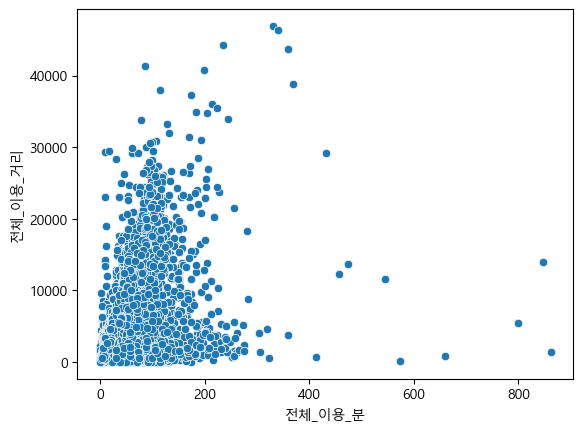

In [ ]:
### 사용시간대별 총 이용시간의 시각화
sns.scatterplot(data=df_1, x='전체_이용_분', y='전체_이용_거리')
plt.show()


## 서울시 따릉이 일별 이용 현황(20240105)

In [ ]:
file_path2 = 'D:\Code\(최종)따릉이/tpss_bcycl_od_statnhm_20240105.csv'

df_2 = pd.read_csv(file_path2, encoding='cp949')

print(f'20240105 데이터프레임 : \n{df_2}')

df_2.isnull().sum()

In [ ]:
df_2.drop(columns=['종료_대여소명'],inplace=True)

print(df_2)

### 불필요한 컬럼 제거

In [ ]:
columns = df_2.columns
print(columns)

In [ ]:
df_2.drop(columns=['집계_기준', '전체_건수'],inplace=True)
print(df_2)

In [ ]:
print(f'1월 5일 데이터프레임 : \n{df_2}')

## EDA

In [ ]:
### 사용시간대별 총 이동거리의 시각화
#sns.kdeplot(data=df_1, x='Time', hue='Total Distance')
#plt.show()


In [ ]:
### 사용시간대별 총 이용시간의 시각화
sns.scatterplot(data=df_2, x='Used_Time', y='Total Distance')
plt.show()


## 서울시 따릉이 일별 이용 현황(20240106)

In [ ]:
file_path3 = 'D:\Code\(최종)따릉이/tpss_bcycl_od_statnhm_20240106.csv'

df_3 = pd.read_csv(file_path3, encoding='cp949')

print(f'20240106 데이터프레임 : \n{df_3}')

# 결측치 확인

df_3.isnull().sum()

In [ ]:
df_3.drop(columns=['종료_대여소명'],inplace=True)

print(df_3)

### 불필요한 컬럼 제거

In [ ]:
columns = df_3.columns
print(columns)

In [ ]:
df_3.drop(columns=['집계_기준', '전체_건수'],inplace=True)
print(df_3)

In [ ]:
print(f'1월 5일 데이터프레임 : \n{df_3}')

## EDA

In [ ]:
### 사용시간대별 총 이동거리의 시각화
#sns.kdeplot(data=df_1, x='Time', hue='Total Distance')
#plt.show()


In [ ]:
### 사용시간대별 총 이용시간의 시각화
sns.scatterplot(data=df_3, x='Used_Time', y='Total Distance')
plt.show()
